#  Multiple Sclerosis (MS) Disease Classification 

The goal of this project is to develop a machine learning model for the classification of Multiple Sclerosis (MS) disease. MS is a chronic autoimmune disease affecting the central nervous system, causing various neurological symptoms. Early detection and accurate classification of MS can assist in timely intervention and treatment planning.

# Importing Libraries 

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [3]:
dataframe = pd.read_csv('conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

# Exploratory Data Analysis

The process of analyzing and understanding a dataset to gain insights and identify patterns or trends. The goal of exploring the data is to become familiar with its structure, distribution, and quality, as well as to identify potential issues or anomalies that may need to be addressed before further analysis.

In [4]:
dataframe.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [5]:
dataframe.tail()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2
272,272,2,77,6.0,3,3,2.0,1,0,0,1,0,0,0,0,0,0,NaN,NaN,2


In [6]:
dataframe = dataframe.drop('Unnamed: 0', axis = 1)

In [7]:
dataframe.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [8]:
dataframe.shape

(273, 19)

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    int64  
 1   Age                      273 non-null    int64  
 2   Schooling                272 non-null    float64
 3   Breastfeeding            273 non-null    int64  
 4   Varicella                273 non-null    int64  
 5   Initial_Symptom          272 non-null    float64
 6   Mono_or_Polysymptomatic  273 non-null    int64  
 7   Oligoclonal_Bands        273 non-null    int64  
 8   LLSSEP                   273 non-null    int64  
 9   ULSSEP                   273 non-null    int64  
 10  VEP                      273 non-null    int64  
 11  BAEP                     273 non-null    int64  
 12  Periventricular_MRI      273 non-null    int64  
 13  Cortical_MRI             273 non-null    int64  
 14  Infratentorial_MRI       2

# Data Cleaning

Data cleaning is an essential step in the data preprocessing phase of a machine learning project. It involves identifying and handling missing values, dealing with outliers, removing duplicates, and addressing other data quality issues

Remove rows or columns with missing values if they are few or have little impact on the overall dataset.

Impute missing values using techniques like mean, median

In [10]:
dataframe.isna().sum().any()

True

In [11]:
dataframe.isna().sum()

Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [12]:
dataframe.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS', 'group'],
      dtype='object')

In [13]:
dataframe = dataframe.drop(['Initial_EDSS', 'Final_EDSS'], axis = 1)

In [14]:
dataframe.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1


In [15]:
dataframe['Schooling'] = dataframe['Schooling'].fillna(dataframe['Schooling'].mean())

In [16]:
dataframe['Initial_Symptom'] = dataframe['Initial_Symptom'].fillna(dataframe['Initial_Symptom'].mean())

In [17]:
dataframe.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1


In [18]:
dataframe.isna().sum().any()

False

# Data Visualization

Data visualization is a powerful technique for gaining insights, identifying patterns, and communicating findings from data. It involves creating visual representations of data using charts, graphs, plots, and other graphical elements.

In [19]:
dataframe['group'].value_counts()

2    148
1    125
Name: group, dtype: int64

<AxesSubplot:title={'center':'Group with sclerosis'}>

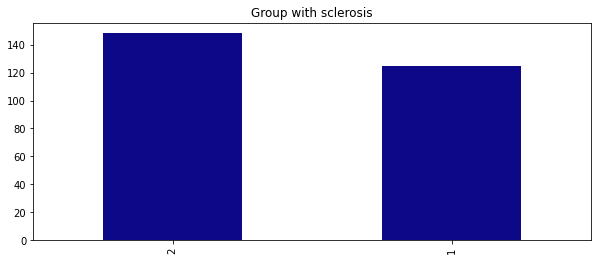

In [20]:
dataframe['group'].value_counts().plot(kind = 'bar', 
                                       cmap = 'plasma', 
                                       figsize = (10, 4), 
                                       title = 'Group with sclerosis', 
                                       rot = 90)

In [21]:
dataframe['Gender'].value_counts()

2    168
1    105
Name: Gender, dtype: int64

In [22]:
pd.crosstab(dataframe.Gender, dataframe.group)

group,1,2
Gender,,
1,64,41
2,61,107


<AxesSubplot:title={'center':'Gender with Sclerosis syndrom'}, xlabel='Gender'>

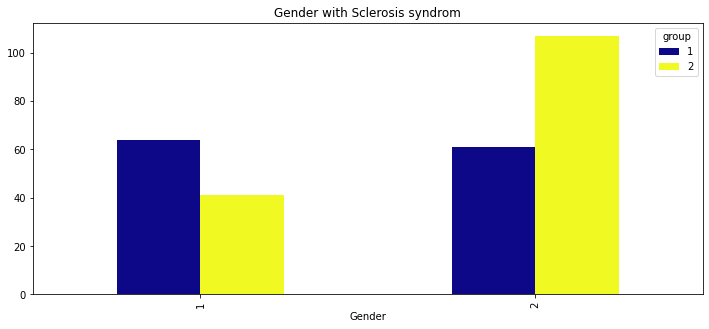

In [23]:
pd.crosstab(dataframe.Gender, dataframe.group).plot(kind = 'bar',
                                                    cmap = 'plasma',
                                                    figsize = (12, 5), 
                                                    title = 'Gender with Sclerosis syndrom', 
                                                    rot = 90)

# Statical Info

Statistical information refers to numerical data or metrics that describe various aspects of a dataset or population. These statistics provide quantitative measures of central tendency, dispersion, relationships, and other properties of the data.

In [24]:
dataframe.describe()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,1.615385,34.062271,15.176471,1.831502,1.710623,6.430147,1.725275,0.358974,0.424908,0.369963,0.307692,0.065934,0.505495,0.432234,0.293040,0.315018,1.542125
std,0.487398,11.114369,4.236366,0.874998,0.732991,4.214241,0.494066,0.558426,0.495237,0.483681,0.462386,0.248623,0.500888,0.496296,0.455993,0.465376,0.499137
min,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,25.000000,12.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,33.000000,15.000000,2.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,2.000000,40.000000,20.000000,3.000000,2.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,2.000000,77.000000,25.000000,3.000000,3.000000,15.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [25]:
corr_matrix = dataframe.corr()

In [26]:
corr_matrix

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
Gender,1.000000,0.073662,-0.011521,-0.083554,-0.024540,-0.142896,-0.012918,-0.152741,-0.158170,-0.158350,-0.158114,-0.154031,-0.194613,-0.130943,-0.169238,0.001247,0.240633
Age,0.073662,1.000000,-0.157047,-0.062050,0.153851,0.107284,-0.027001,-0.019016,0.055289,0.088708,0.010566,0.208723,0.031307,0.083082,-0.042061,0.125557,-0.064426
Schooling,-0.011521,-0.157047,1.000000,-0.083021,-0.173903,0.012414,0.037300,0.001371,-0.023296,-0.067548,0.005962,0.062214,0.020180,0.038778,-0.060790,0.055944,-0.184197
Breastfeeding,-0.083554,-0.062050,-0.083021,1.000000,0.582905,0.015172,0.045605,0.026431,-0.063243,-0.095397,0.046833,-0.067042,-0.031434,-0.051789,-0.050865,-0.004597,0.142580
Varicella,-0.024540,0.153851,-0.173903,0.582905,1.000000,0.007631,-0.017292,-0.032703,-0.095529,-0.039124,0.057575,-0.036136,-0.100797,0.031800,-0.064345,-0.033557,0.169099
Initial_Symptom,-0.142896,0.107284,0.012414,0.015172,0.007631,1.000000,0.522113,0.110459,0.215092,0.251709,0.186535,0.144768,0.330294,0.009216,0.253664,0.238087,-0.388416
Mono_or_Polysymptomatic,-0.012918,-0.027001,0.037300,0.045605,-0.017292,0.522113,1.000000,0.092253,0.148275,0.073035,0.194356,0.088145,0.132399,0.021255,0.048598,0.153923,-0.034895
Oligoclonal_Bands,-0.152741,-0.019016,0.001371,0.026431,-0.032703,0.110459,0.092253,1.000000,-0.061697,-0.030713,0.069001,0.093700,0.084930,0.021769,0.018510,0.072548,-0.186351
LLSSEP,-0.158170,0.055289,-0.023296,-0.063243,-0.095529,0.215092,0.148275,-0.061697,1.000000,0.599875,0.390263,0.100077,0.183227,0.177415,0.130361,0.342295,-0.221406
ULSSEP,-0.158350,0.088708,-0.067548,-0.095397,-0.039124,0.251709,0.073035,-0.030713,0.599875,1.000000,0.343948,0.132705,0.211617,0.112482,0.156739,0.264320,-0.194231


<AxesSubplot:>

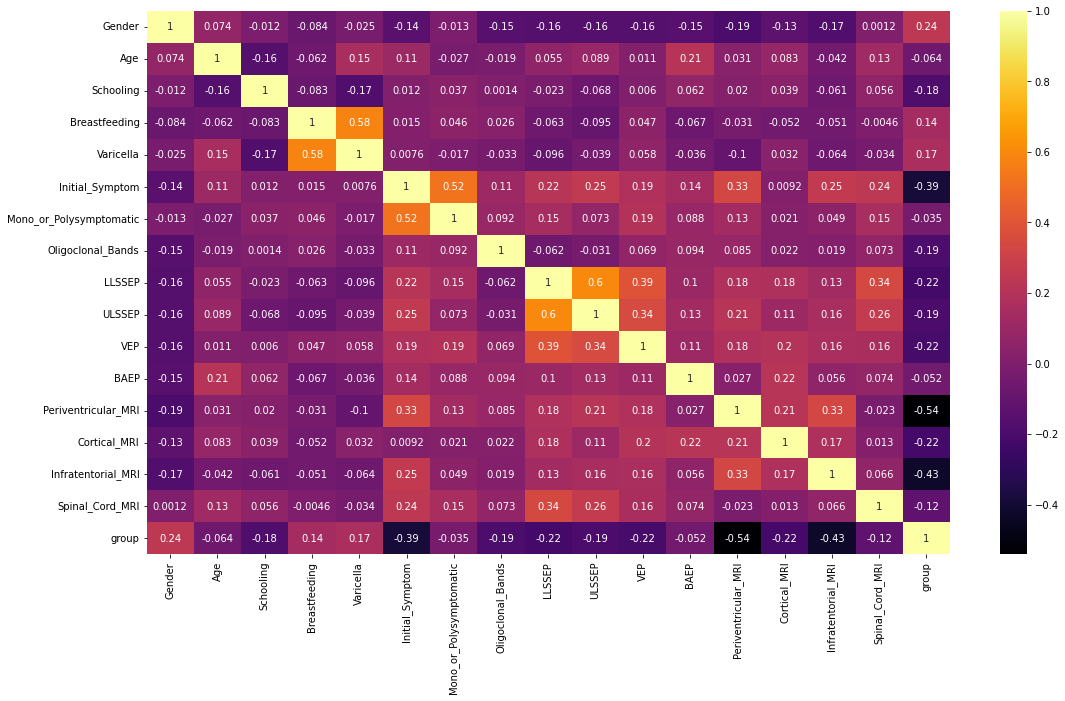

In [27]:
plt.figure(figsize = (18, 10))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'inferno')

In [28]:
dataset = dataframe.drop('group', axis = 1)

In [29]:
dataset.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0


<AxesSubplot:title={'center':'Correlation With Sclerosis Syndrom Group'}>

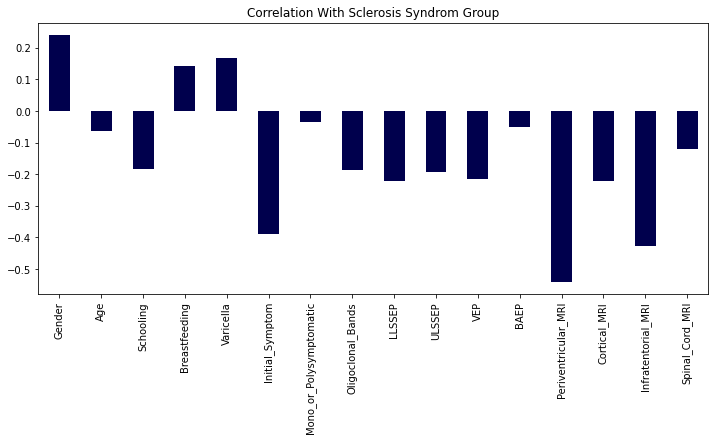

In [30]:
dataset.corrwith(dataframe['group']).plot.bar(
    figsize = (12, 5), 
    title = 'Correlation With Sclerosis Syndrom Group', 
    rot = 90, 
    cmap = 'seismic'
)

In [31]:
dataframe.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'group'],
      dtype='object')

# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [32]:
x = dataframe.drop('group', axis = 1)
y = dataframe['group']

In [33]:
x.shape, y.shape

((273, 16), (273,))

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 101)

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((218, 16), (55, 16), (218,), (55,))

# Scaling

Scaling is a preprocessing technique used in machine learning to transform the input features to a similar scale. It is often necessary because features can have different units, ranges, or magnitudes, which can affect the performance of certain algorithms. Scaling ensures that all features contribute equally to the learning process and prevents features with larger values from dominating those with smaller values.

StandardScaler is a commonly used method for scaling numerical features in machine learning. It is part of the preprocessing module in scikit-learn, a popular machine learning library in Python.

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
x_train

array([[ 7.38985312e-01,  2.77347238e-01, -4.39550143e-02, ...,
         1.17028425e+00, -6.66114562e-01, -7.24206824e-01],
       [ 7.38985312e-01,  3.67723468e-01, -7.91982239e-04, ...,
        -8.54493259e-01,  1.50124327e+00,  1.38082101e+00],
       [ 7.38985312e-01,  9.65947780e-02, -7.77726559e-01, ...,
        -8.54493259e-01, -6.66114562e-01, -7.24206824e-01],
       ...,
       [-1.35320687e+00, -5.36038832e-01, -7.77726559e-01, ...,
         1.17028425e+00,  1.50124327e+00, -7.24206824e-01],
       [ 7.38985312e-01, -5.36038832e-01,  1.17899756e+00, ...,
         1.17028425e+00,  1.50124327e+00,  1.38082101e+00],
       [ 7.38985312e-01, -8.07167522e-01,  1.17899756e+00, ...,
         1.17028425e+00, -6.66114562e-01,  1.38082101e+00]])

In [41]:
x_test

array([[-1.35320687,  0.36772347, -0.04395501,  0.17347051, -0.96340361,
        -0.83825892, -1.4755613 , -0.64708466, -0.870669  ,  1.26302735,
        -0.67330033,  4.33799283, -1.02791234, -0.85449326, -0.66611456,
         1.38082101],
       [-1.35320687,  0.18697101, -3.71281274, -0.97248618, -0.96340361,
         1.51533909,  0.57330726,  1.13854136, -0.870669  , -0.79174849,
        -0.67330033, -0.23052136,  0.97284561, -0.85449326,  1.50124327,
        -0.72420682],
       [ 0.73898531,  0.00621855, -0.77772656,  1.31942719,  1.76415467,
         0.33854008,  0.57330726, -0.64708466, -0.870669  , -0.79174849,
        -0.67330033, -0.23052136, -1.02791234, -0.85449326, -0.66611456,
        -0.72420682],
       [-1.35320687, -1.16867244, -0.04395501,  1.31942719,  1.76415467,
        -0.36753932,  0.57330726,  1.13854136, -0.870669  , -0.79174849,
        -0.67330033, -0.23052136, -1.02791234, -0.85449326, -0.66611456,
         1.38082101],
       [ 0.73898531, -0.80716752, -0

In [42]:
x_train.shape, x_test.shape

((218, 16), (55, 16))

# Machine Learning Models

There are numerous machine learning models available for various tasks, including classification, regression, clustering, and more. Here are some commonly used machine learning models:

Random Forest: An ensemble model that combines multiple decision trees to improve accuracy and reduce overfitting.

In [46]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [47]:
random_forest = RandomForestClassifier()

In [48]:
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
y_pred_random = random_forest.predict(x_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score

# Error Analysis

Error analysis is an important step in evaluating and improving the performance of a machine learning model. It involves analyzing the errors made by the model during prediction or classification tasks and gaining insights into the types of mistakes it is making. Error analysis can provide valuable information for model refinement and identifying areas for improvement

# Classification Report

The classification report is a performance evaluation metric for classification models that provides various metrics such as precision, recall, F1-score, and support for each class. These metrics help assess the model's performance in terms of class-wise classification accuracy.

# Accuracy Score

Accuracy is a commonly used metric for evaluating classification models. It measures the proportion of correctly classified instances out of the total instances. The formula for calculating accuracy is as follows:

Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

# Confusion Matrix

A confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives. The confusion matrix provides valuable insights into the model's performance for each class and can be used to calculate various evaluation metrics. 

                 Predicted
               |  Class 0 | Class 1 |
------------------------------------

Actual Class 0 |    TN    |   FP    |

Actual Class 1 |    FN    |   TP    |


# r2 Score

The R2 score (also known as the coefficient of determination) is a commonly used metric for evaluating regression models. It measures the proportion of the variance in the dependent variable that is predictable from the independent variables. The formula for calculating the R2 score is as follows:

R2 Score = 1 - (Sum of Squared Residuals / Total Sum of Squares)

In [51]:
acc_random = accuracy_score(y_test, y_pred_random)

In [53]:
acc_random

0.8181818181818182

In [54]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           1       0.83      0.76      0.79        25
           2       0.81      0.87      0.84        30

    accuracy                           0.82        55
   macro avg       0.82      0.81      0.82        55
weighted avg       0.82      0.82      0.82        55



In [56]:
r2_random = r2_score(y_test, y_pred_random)

In [57]:
r2_random

0.26666666666666683

In [55]:
confusion_matrix_random = confusion_matrix(y_test, y_pred_random)

<AxesSubplot:>

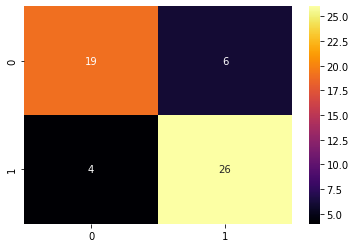

In [58]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix_random, 
            annot = True, 
            cmap = 'inferno')

Support Vector Machines (SVM): A powerful classification model that separates data using hyperplanes to maximize the margin between different classes.

In [61]:
svc = SVC()

In [62]:
svc.fit(x_train, y_train)

SVC()

In [63]:
y_pred_svc = svc.predict(x_test)

In [64]:
accuracy_score_svc = accuracy_score(y_test, y_pred_svc)

In [65]:
accuracy_score_svc

0.8181818181818182

In [66]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.83      0.76      0.79        25
           2       0.81      0.87      0.84        30

    accuracy                           0.82        55
   macro avg       0.82      0.81      0.82        55
weighted avg       0.82      0.82      0.82        55



In [67]:
r2_score_svc = r2_score(y_test, y_pred_svc)

In [68]:
r2_score_svc

0.26666666666666683

In [69]:
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)

<AxesSubplot:>

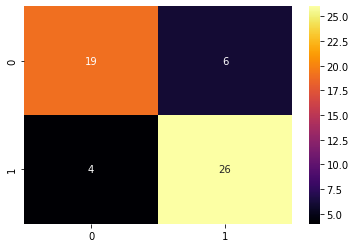

In [70]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix_svc, 
            annot = True, 
            cmap = 'inferno')